Actividad 6: Redes neuronales

Objetivo. Entrenamiento de Red Neurobal Comvolucional.

Nombre: Jean Carlos Javier Rubio Camarillo. Matricula: 2016184 Hora: N4

Cargamos librerias.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


Cargamos Datos

In [2]:
keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
#assert train_images.shape == (60000, 28, 28)
#assert test_images.shape == (10000, 28, 28)
#assert train_labels.shape == (60000,)
#assert test_labels.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


Ajustar la forma de los datos para que sea (n_images, x_shape, y_shape, channel)

In [3]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

Nombramos las clases

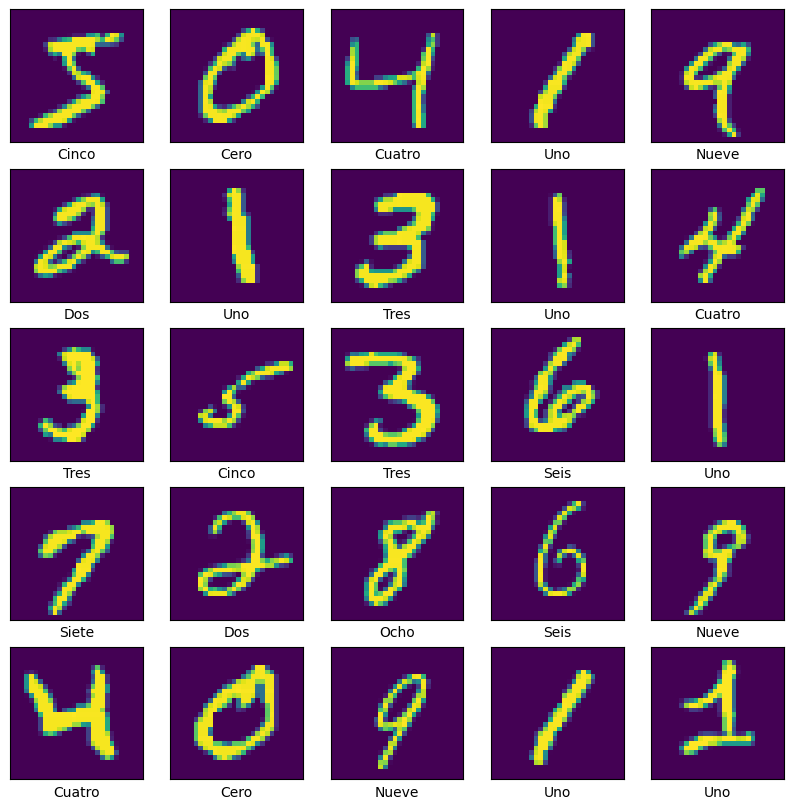

In [4]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Creamos el modelo

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
Total params: 42728 (166.91 KB)
Trainable params: 4272

Añadimos capas densas.

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)              

Compilamos el modelo.

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Entrenamos el modelo.

In [11]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2946 - accuracy: 0.9162 - val_loss: 0.0791 - val_accuracy: 0.9753
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 0.0532 - val_accuracy: 0.9817
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0406 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0341 -

Evaluamos el modelo.

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0314 - accuracy: 0.9910 - 2s/epoch - 8ms/step

Test accuracy: 0.9909999966621399


Graficamos la precisión del modelo durante el entrenamiento.

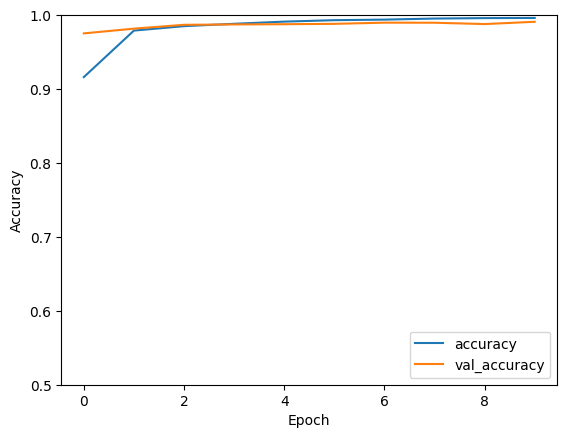

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Realizamos las 5 diferentes predicciones con el conjunto de datos de prueba.

In [15]:
predictions = model.predict(test_images[:5])
print('Predicciones:', predictions.argmax(axis=1))
print('Valores reales:', test_labels[:5])

1/1 [==============================] - 0s 208ms/step
Predicciones: [7 2 1 0 4]
Valores reales: [7 2 1 0 4]


In [16]:
print(test_acc)

0.9909999966621399


Realizamos la prediccion con el modelo.

In [17]:
prediccion = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


Prediccion de la imagen 1

In [18]:
print("Predicción (probabilidades):", prediccion[1])

Predicción (probabilidades): [ -0.10372481  -1.7604778    7.048364    -3.1617491   -4.634345
 -10.596902    -5.9239817   -4.64255     -9.368038   -11.018901  ]


Probabolidad maxima

In [19]:
print("Clase predicha:", np.argmax(prediccion[1]))

Clase predicha: 2


Resultado real

In [20]:
print("Clase real:", test_labels[1])

Clase real: 2


Imagen prediccion 1

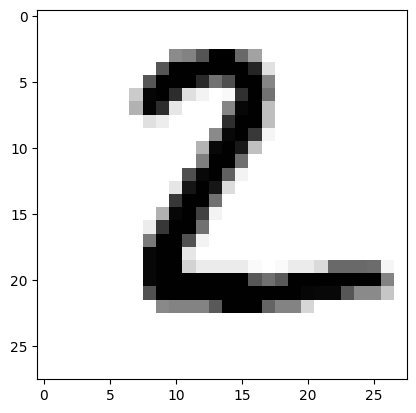

In [21]:
plt.figure()
plt.imshow(test_images[1].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Visualizamos las predicciones

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Graficamos la prediccion de la imagen 1

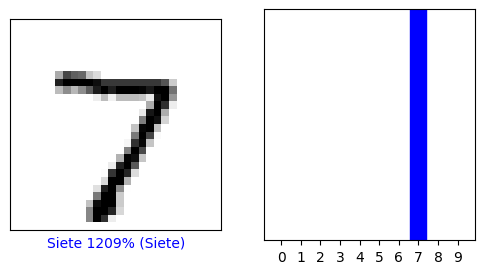

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Graficamos varias imagenes

313/313 [==============================] - 3s 8ms/step


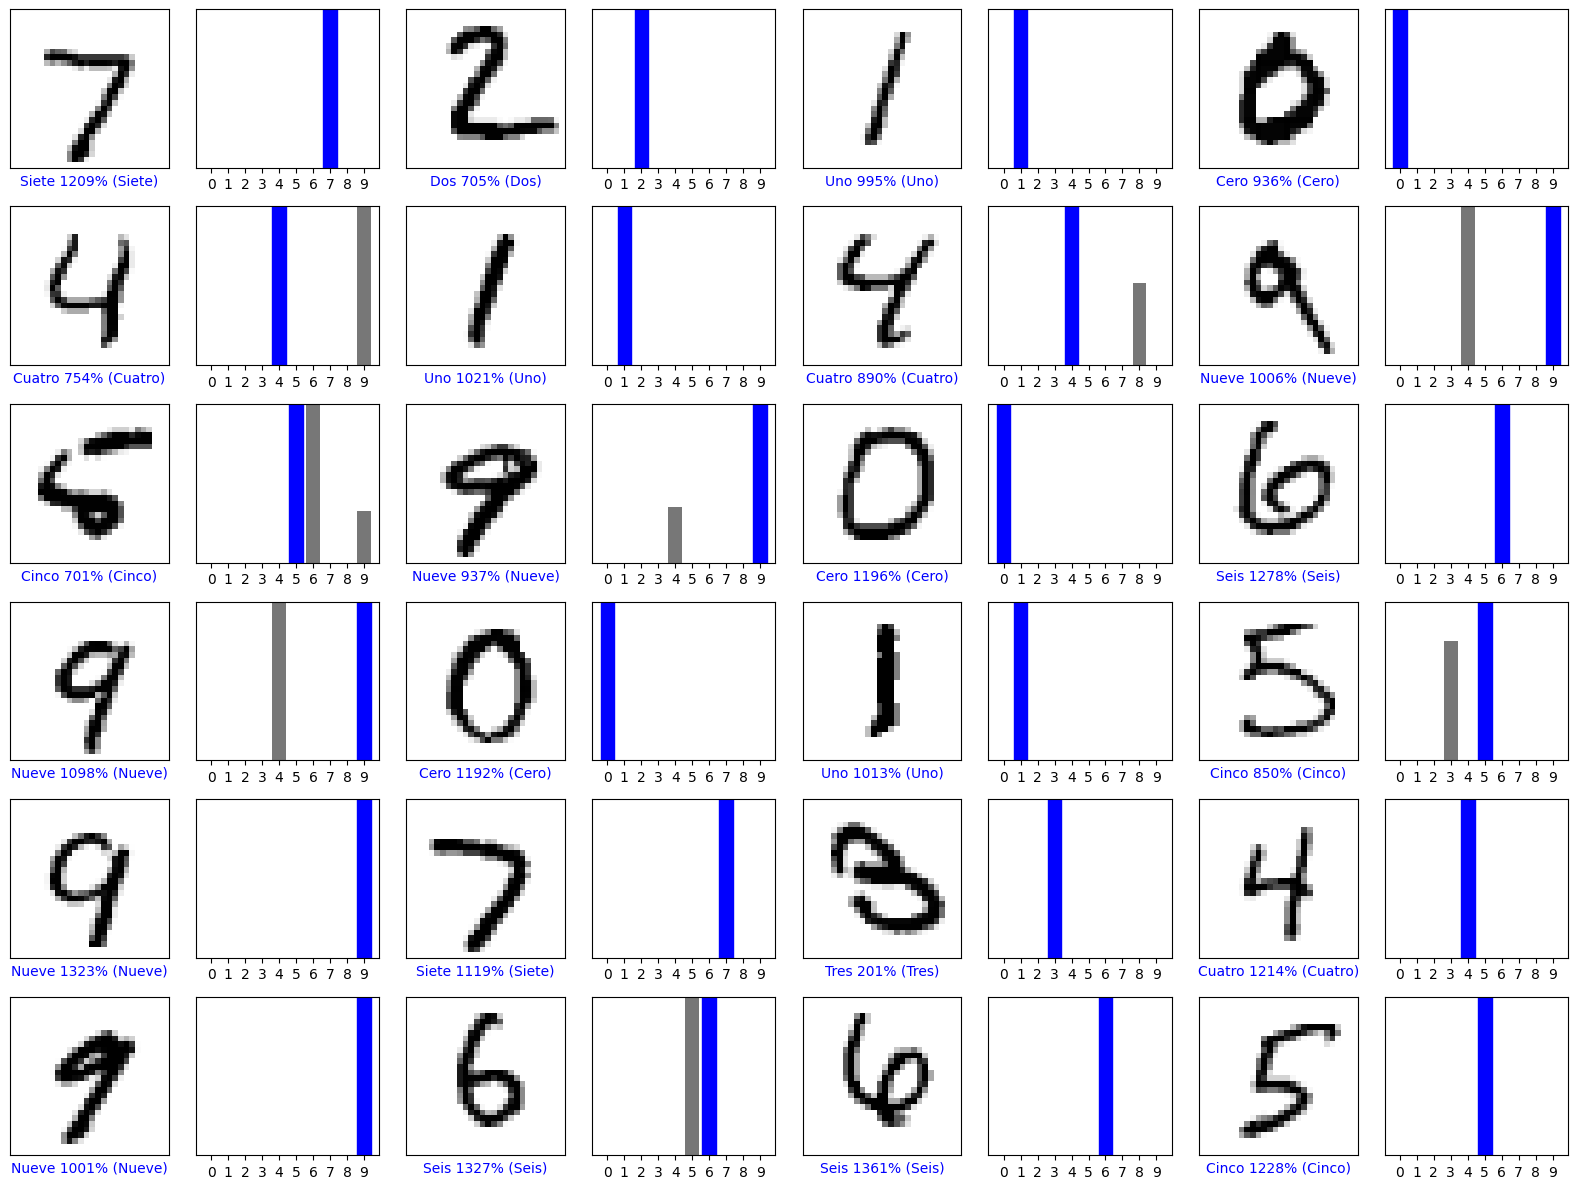

In [24]:
predictions = model.predict(test_images)
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Seleccionamos la imagen del conjuntom de datos de prueba.

In [25]:
img = test_images[1]

Imprimimos el tamaño de la imagen.

In [26]:
print(img.shape)

(28, 28, 1)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


Predecimos el lote quen se creol.

In [28]:
predictions_single = model.predict(img)

1/1 [==============================] - 0s 37ms/step


Imprimimos la prediccion del modelo.

In [29]:
print(predictions_single)

[[ -0.10372524  -1.7604765    7.0483627   -3.1617496   -4.6343446
  -10.596903    -5.923982    -4.6425495   -9.368039   -11.018899  ]]


Visualizamos la grafica de probabilidades.

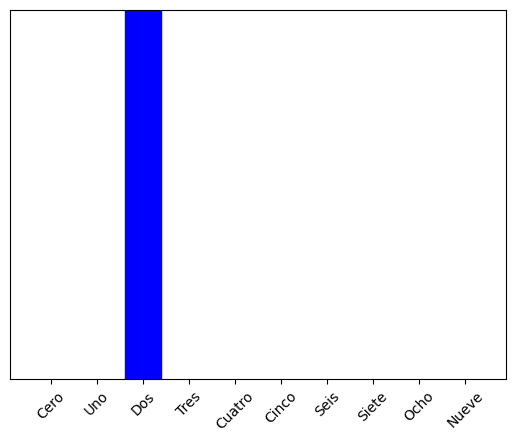

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

Visualizamos el valor más alto de la imagen.

In [31]:
np.argmax(predictions_single[0])

2

# **PREGUNTAS**

**¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?**

Utilice el mismom número de épocas que en la actividad anterior.

**¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?**

En la actividad pasada se obtuvo un rendimiento del 97% y en esta fue de  99% casi el 100, por lo tanto se obtuvo un mejor rendimiento. Esto debido a que la Red Neuronal Convolucional tiene un mejor rendimiento que la Red Neuronal Prealimentada.